In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
import datetime, os

C:\Users\rayde\AppData\Local\Temp\ipykernel_38648\744215454.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(part[...,0], part[...,1], c=cmap(i/n_partitions/n_partitions) )


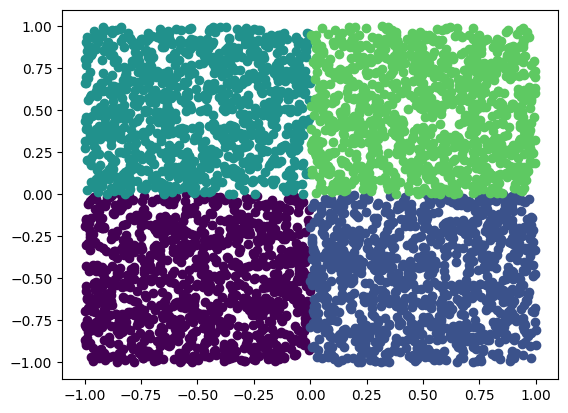

In [2]:
n_samples = 1000
n_partitions = 2

random_samples = 2*np.random.rand(n_partitions**2, 2, n_samples)/n_partitions

# Create a grid of points in the domain [0, 1]^2
x = np.linspace(-1, 1, n_partitions, endpoint=False)
y = np.linspace(-1, 1, n_partitions, endpoint=False)
X,Y = np.meshgrid(x,y)
partitions = random_samples + np.stack([X.flatten(), Y.flatten()]).T[..., np.newaxis]
partitions = np.swapaxes(partitions, 1, 2)

cmap = plt.get_cmap('viridis') 

for i, part  in enumerate(partitions):
    plt.scatter(part[...,0], part[...,1], c=cmap(i/n_partitions/n_partitions) )

C:\Users\rayde\AppData\Local\Temp\ipykernel_38648\1564516279.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(part[...,0], part[...,1], c=cmap(i/n_partitions/n_partitions) )


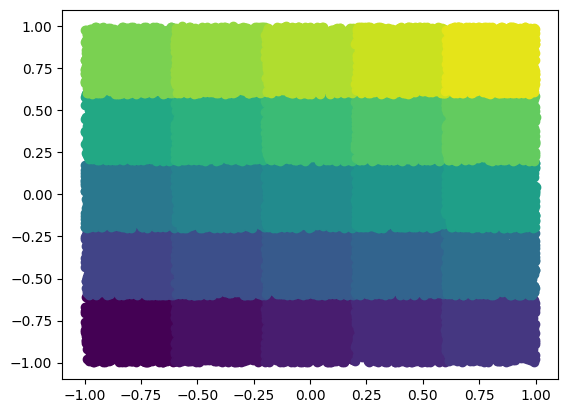

In [3]:
n_samples = 1000
n_partitions = 5

random_samples = 2*np.random.rand(n_partitions**2, 2, n_samples)/n_partitions

# Create a grid of points in the domain [0, 1]^2
x = np.linspace(-1, 1, n_partitions, endpoint=False)
y = np.linspace(-1, 1, n_partitions, endpoint=False)
X,Y = np.meshgrid(x,y)
partitions = random_samples + np.stack([X.flatten(), Y.flatten()]).T[..., np.newaxis]
partitions = np.swapaxes(partitions, 1, 2)

cmap = plt.get_cmap('viridis') 

for i, part  in enumerate(partitions):
    plt.scatter(part[...,0], part[...,1], c=cmap(i/n_partitions/n_partitions) )

In [4]:
# Define vector function with three scalar functions
def f_sum_decomposable(x):
    x1, x2 = x[:,0], x[:,1]
    return np.array([np.sin(4 * np.pi * x1) + np.sin(4 * np.pi * x2),
            np.sin(3 * np.pi * ((x1-0.5)**2)) + np.cos(2*np.pi*((x2-0.5)**2)),
            np.sin(6 * np.pi * (x1)**2) - np.sin(6 * np.pi * (x2)**2)]).T

# Define vector function with three scalar functions
def f_prod(x):
    x1, x2 = x[:,0], x[:,1]
    return np.array([np.sin(4 * np.pi * x1) * np.sin(4 * np.pi * x2),
            np.sin(4 * np.pi * ((x1)**2+(x2)**2)),
            np.cos(3 * np.pi * (x1)**2) * np.cos(4 * np.pi * (x2)**2)]).T

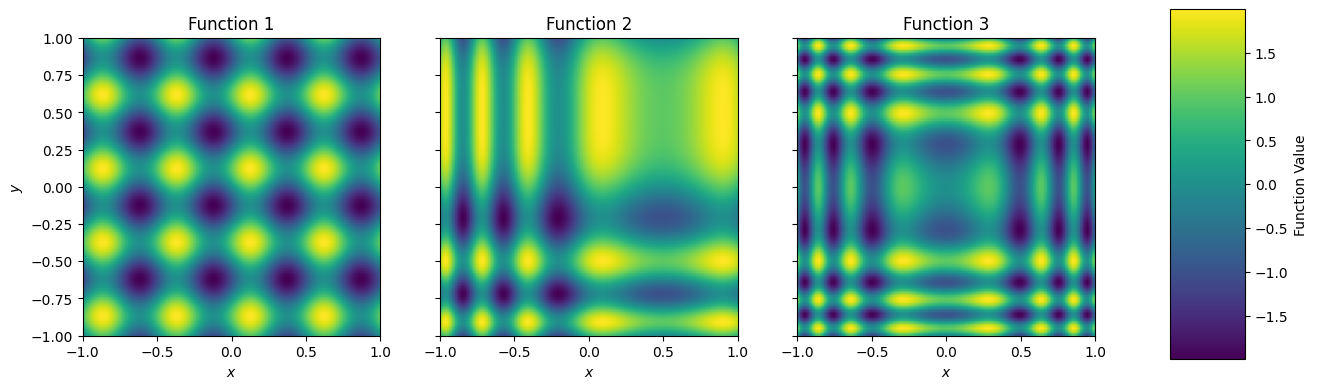

In [5]:
# Create a grid of points in the domain [0, 1]^2
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X,Y = np.meshgrid(x,y)
coordinates = np.stack([X.flatten(), Y.flatten()]).T


f = f_sum_decomposable
# Compute the function values at the grid points for each functions
Z = f(coordinates)
Z = Z.reshape(100,100,3)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)
fig.subplots_adjust(right=0.8)

cmap="viridis"
titles=['Function 1', 'Function 2', 'Function 3']
for idx in range(3):
    im = axs[idx].imshow(Z[:,:,idx], extent=[-1, 1, -1 ,1], origin='lower', cmap=cmap)
    axs[idx].set_xlabel('$x$')
    axs[idx].set_title(titles[idx])

axs[0].set_ylabel('$y$')

cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Function Value')

#plt.savefig('target_function.png', dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

Text(0.5, 0, 'Function Value')

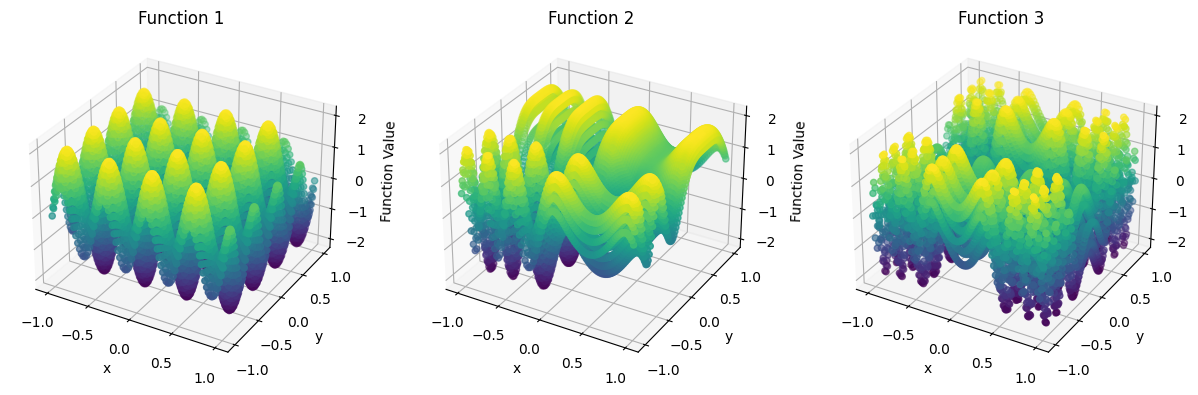

In [6]:
#put the x, y and respective z values into 3 dataframes, label the z value as label 
df1 = pd.DataFrame(data=coordinates, columns=['x', 'y'])
df1['label'] = Z[:,:,0].flatten()
df2 = pd.DataFrame(data=coordinates, columns=['x', 'y'])
df2['label'] = Z[:,:,1].flatten()
df3 = pd.DataFrame(data=coordinates, columns=['x', 'y'])
df3['label'] = Z[:,:,2].flatten()

#plot the 3d scatter plot
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df1['x'], df1['y'], df1['label'], c=df1['label'], cmap='viridis')
ax.set_title('Function 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function Value')

ax = fig.add_subplot(132, projection='3d')
ax.scatter(df2['x'], df2['y'], df2['label'], c=df2['label'], cmap='viridis')
ax.set_title('Function 2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function Value')

ax = fig.add_subplot(133, projection='3d')
ax.scatter(df3['x'], df3['y'], df3['label'], c=df3['label'], cmap='viridis')
ax.set_title('Function 3')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function Value')


In [7]:
#show the shape of the data
print(df1.shape)
print(df2.shape)
print(df3.shape)

df1.head()

(10000, 3)
(10000, 3)
(10000, 3)


,x,y,label
0,-1.000000,-1.0,9.797174e-16
1,-0.979798,-1.0,2.511480e-01
2,-0.959596,-1.0,4.861967e-01
3,-0.939394,-1.0,6.900790e-01
4,-0.919192,-1.0,8.497254e-01


C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

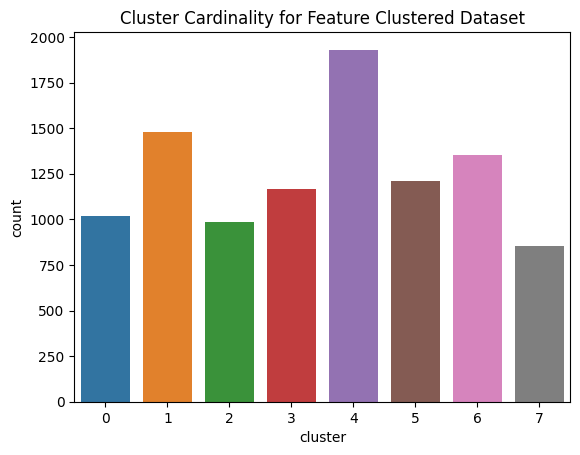

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

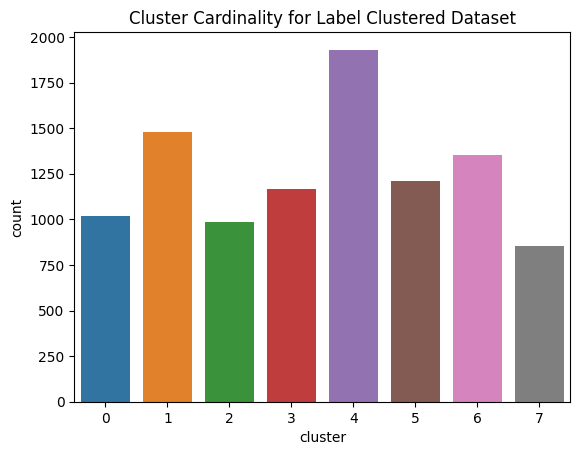

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

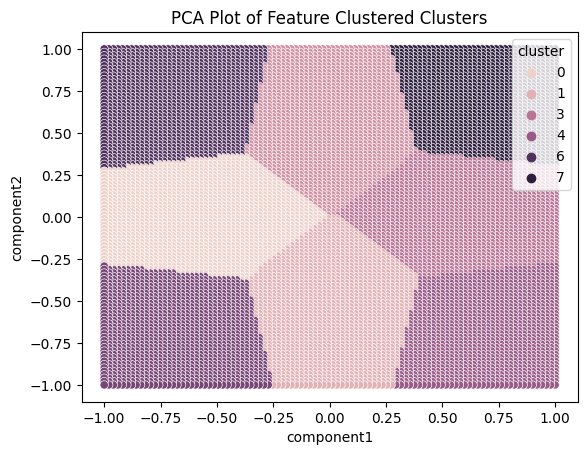

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

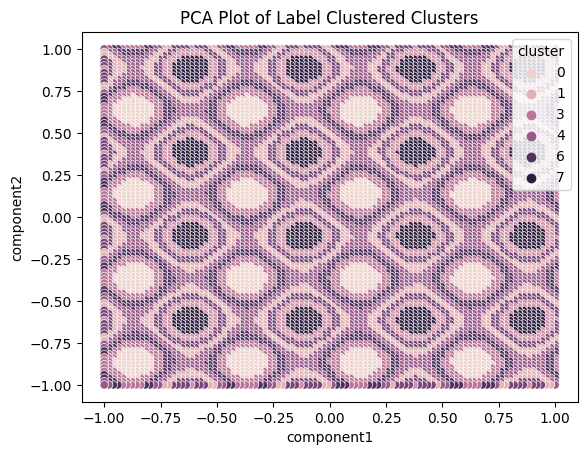

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

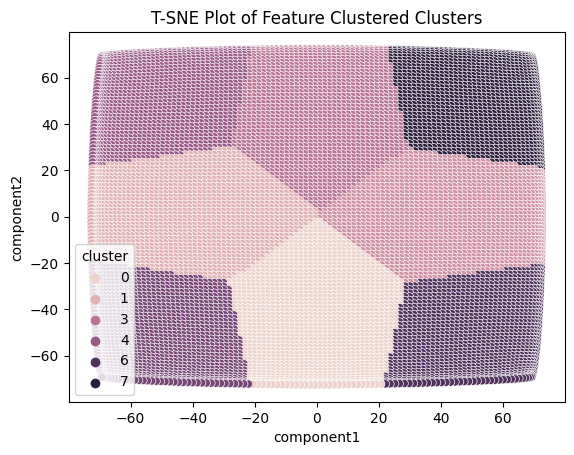

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

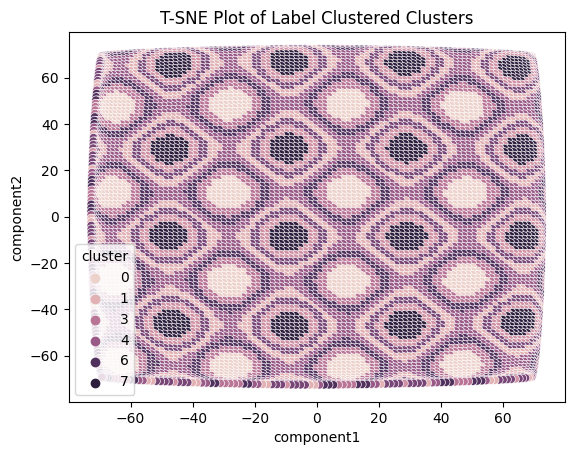

In [8]:
#kmeans clustering
def cluster_dataset_kmeans_features(dataset, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    features = dataset.drop('label', axis=1).values
    clusters = kmeans.fit_predict(features)
    dataset['cluster'] = clusters
    
    return dataset, clusters

#kmeans clustering on just the label method def
def cluster_dataset_kmeans_label(dataset, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    features = dataset[['label']].values
    clusters = kmeans.fit_predict(features)
    dataset['cluster'] = clusters
    
    return dataset, clusters

n_clusters = 8
#set which dataset to use
dataset = df1.copy()
feature_clustered_dataset, feature_clustered_clusters = cluster_dataset_kmeans_features(dataset, n_clusters=n_clusters)
label_clustered_dataset, label_clustered_clusters = cluster_dataset_kmeans_label(dataset, n_clusters=n_clusters)

#graph the cardinality of each cluster for the feature clustered dataset and the label clustered dataset
sns.countplot(x='cluster', data=feature_clustered_dataset)
plt.title('Cluster Cardinality for Feature Clustered Dataset')
plt.show()

sns.countplot(x='cluster', data=label_clustered_dataset)
plt.title('Cluster Cardinality for Label Clustered Dataset')
plt.show()

#create a pca plot of the clusters
pca = PCA(n_components=2)
components = pca.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = feature_clustered_clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.title('PCA Plot of Feature Clustered Clusters')
plt.show()

#same for label clustered clusters
pca = PCA(n_components=2)
components = pca.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = label_clustered_clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.title('PCA Plot of Label Clustered Clusters')
plt.show()

#create a T-SNE plot of the clusters
tsne = TSNE(n_components=2)
components = tsne.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = feature_clustered_clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.title('T-SNE Plot of Feature Clustered Clusters')
plt.show()

#same for label clustered clusters
tsne = TSNE(n_components=2)
components = tsne.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = label_clustered_clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.title('T-SNE Plot of Label Clustered Clusters')
plt.show()

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

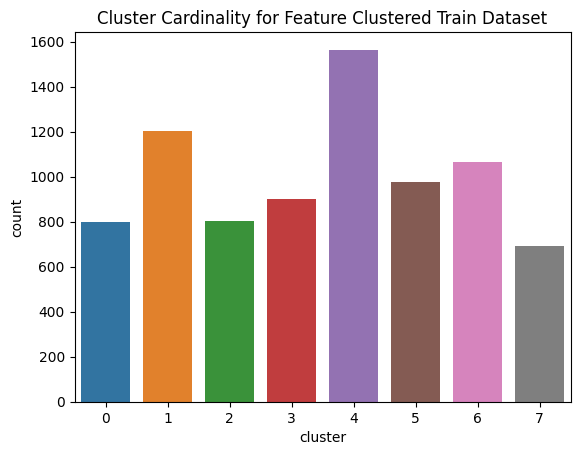

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

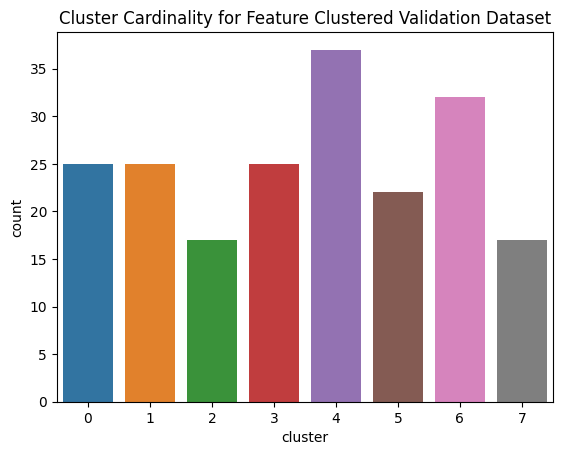

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

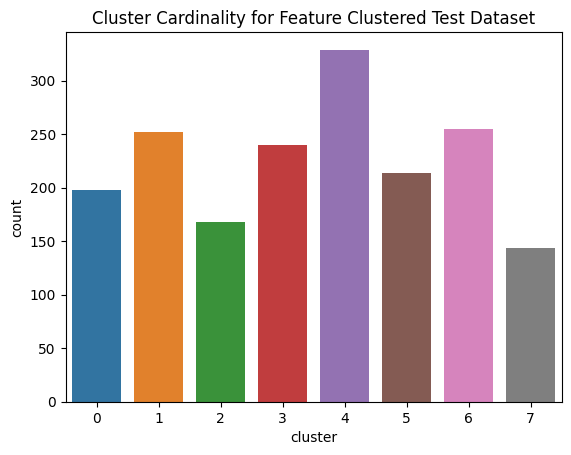

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

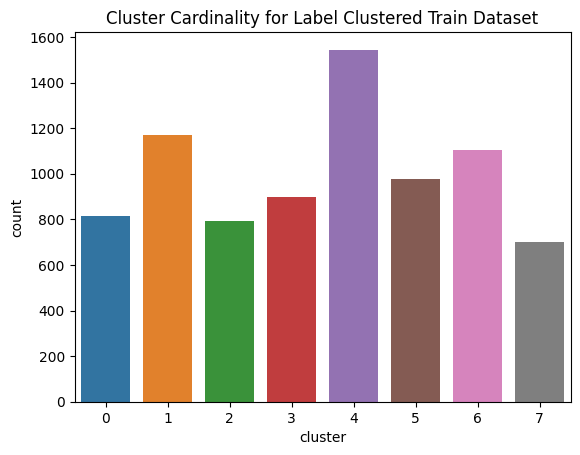

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

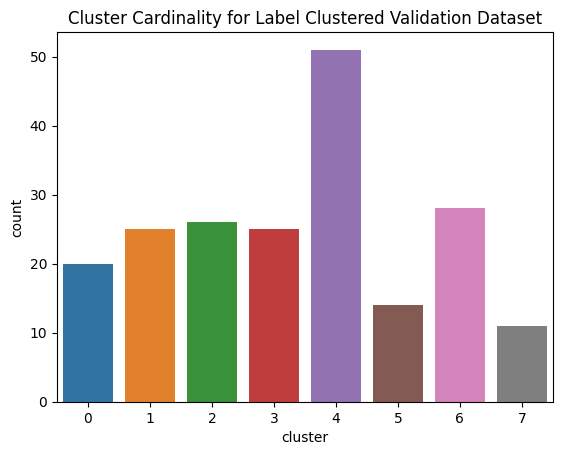

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

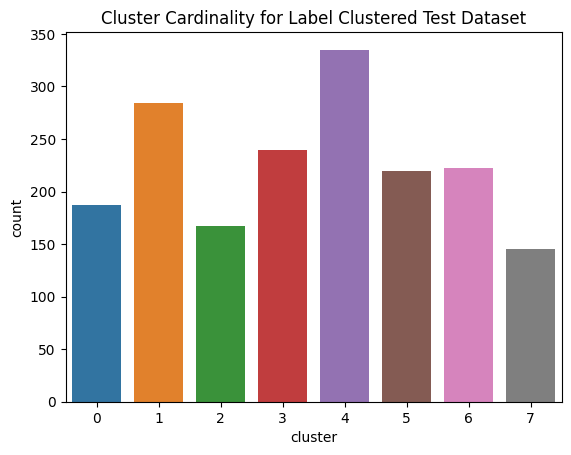

In [9]:
#split the dataset into training and testing and validation sets
def split_dataset(dataset, train_size=0.8, val_size=0.1, test_size=0.1):
    train_dataset = dataset.sample(frac=train_size)
    dataset = dataset.drop(train_dataset.index)
    val_dataset = dataset.sample(frac=val_size)
    test_dataset = dataset.drop(val_dataset.index)
    
    return train_dataset, val_dataset, test_dataset

#split the dataset for feature clustered dataset and label clustered dataset
train_dataset_feature, val_dataset_feature, test_dataset_feature = split_dataset(feature_clustered_dataset)
train_dataset_label, val_dataset_label, test_dataset_label = split_dataset(label_clustered_dataset)

#plot the cardinality of clusters within each set
sns.countplot(x='cluster', data=train_dataset_feature)
plt.title('Cluster Cardinality for Feature Clustered Train Dataset')
plt.show()

sns.countplot(x='cluster', data=val_dataset_feature)
plt.title('Cluster Cardinality for Feature Clustered Validation Dataset')
plt.show()

sns.countplot(x='cluster', data=test_dataset_feature)
plt.title('Cluster Cardinality for Feature Clustered Test Dataset')
plt.show()

sns.countplot(x='cluster', data=train_dataset_label)
plt.title('Cluster Cardinality for Label Clustered Train Dataset')
plt.show()

sns.countplot(x='cluster', data=val_dataset_label)
plt.title('Cluster Cardinality for Label Clustered Validation Dataset')
plt.show()

sns.countplot(x='cluster', data=test_dataset_label)
plt.title('Cluster Cardinality for Label Clustered Test Dataset')
plt.show()

In [10]:
#Define the model architecture
class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(CustomModel, self).__init__()
        layers = []
        in_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(in_size, hidden_size))
            layers.append(nn.ReLU())
            in_size = hidden_size
        layers.append(nn.Linear(in_size, output_size))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)
    
#Define the custom optimizer
class COSGD(optim.Optimizer):
    def __init__(self, params, lr):
        defaults = dict(lr=lr)
        super(COSGD, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data
                p.data.add_(-group['lr'], d_p)
        
        return loss

def flatten_grads(grads):
    grads = torch.cat([grad.view(-1) for grad in grads])
    return grads

def unflatten_grads(flattened_grads, model):
    grads = []
    start = 0
    for param in model.parameters():
        end = start + param.numel()
        grads.append(flattened_grads[start:end].view(param.size()))
        start = end
    return grads

def sort_grads(grads, sort_order=True):
    avg_abs = [torch.mean(torch.abs(grad)).item() for grad in grads]
    order = sorted(range(len(avg_abs)), key=lambda i: avg_abs[i], reverse=sort_order)
    return order

def unsort_grads(grads, order):
    unsorted_grads = [grads[i] for i in order]
    return unsorted_grads

def orthogonalize_grads(grads):
    flattened_grads = [flatten_grads(cluster_grads) for cluster_grads in grads]

    #sort the vectors by average absolute value in descending order
    order = sort_grads(flattened_grads)
    flattened_grads = [flattened_grads[i] for i in order]

    #now we have a set of vectors, we can perform the gram schmidt process
    ortho_grads = []
    for i, grad in enumerate(flattened_grads):
        for j in range(i):
            #subtract the projection of the current vector onto the previous vectors
            if torch.norm(ortho_grads[j]) != 0:
                grad = grad - (grad @ ortho_grads[j]) / (ortho_grads[j] @ ortho_grads[j]) * ortho_grads[j]
        ortho_grads.append(grad)
    #sort the vectors back to their original order
    ortho_grads = unsort_grads(ortho_grads, order)
    return ortho_grads


In [57]:
#prepare data loader for the control model using the feature clustered dataset
features = train_dataset_feature.drop(['label', 'cluster'], axis=1).values
labels = train_dataset_feature['label'].values
tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
dataloader = DataLoader(tensor_data, batch_size= 64, shuffle=True)

#do the same for validation
features = val_dataset_feature.drop(['label', 'cluster'], axis=1).values
labels = val_dataset_feature['label'].values
tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
dataloader_val = DataLoader(tensor_data, batch_size= 32, shuffle=True)

# Define the training loop for the control model (standard)
def train_model(model, optimizer, dataloader, loss_function, epochs):
    criterion = loss_function
    model.train()
    
    val_losses = []
    train_losses = []
    for epoch in range(epochs):
        total_loss = 0
        model.train()
        for i, (features, labels) in enumerate(dataloader):
            outputs = model(features)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss / len(dataloader))
        
        #validation loss
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for i, (features, labels) in enumerate(dataloader_val):
                outputs = model(features)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(dataloader_val))
        
        print(f'Epoch {epoch+1}/{epochs} - Loss: {total_loss} - Val Loss: {val_loss}')

    return model, train_losses, val_losses

In [58]:
#get the minimum cardinality of a cluster from all the clusters in the feature clustered dataset
min_cluster_size_feature = int(min(feature_clustered_dataset['cluster'].value_counts()))

#get the minimum cardinality of a cluster from all the clusters in the label clustered dataset
min_cluster_size_label = int(min(label_clustered_dataset['cluster'].value_counts()))

# Prepare data loaders for each cluster for the feature clustered dataset
dataloaders_features = {}
for cluster in range(n_clusters):
    features = train_dataset_feature[train_dataset_feature['cluster'] == cluster].drop(['label', 'cluster'], axis=1).values
    labels = train_dataset_feature[train_dataset_feature['cluster'] == cluster]['label'].values
    tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
    dataloaders_features[cluster] = DataLoader(tensor_data, batch_size=min_cluster_size_feature, shuffle=True)

# Prepare data loaders for each cluster for the label clustered dataset
dataloaders_labels = {}
for cluster in range(n_clusters):
    features = train_dataset_label[train_dataset_label['cluster'] == cluster].drop(['label', 'cluster'], axis=1).values
    labels = train_dataset_label[train_dataset_label['cluster'] == cluster]['label'].values
    tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
    dataloaders_labels[cluster] = DataLoader(tensor_data, batch_size=min_cluster_size_label, shuffle=True)

#train the model using COSGD, this method will train the model over each cluster without updating the model parameters. It will store each 
#clusters gradient updates in a list and then orthogonalize the gradients. The orthogonalized gradients will then be used to update the model 
# parameters by applying each set of orthogonalized gradients to the model parameters
def train_model_cosgd(model, optimizer, dataloaders, loss_function, epochs):
    criterion = loss_function
    model.train()
    
    
    val_losses = []
    for epoch in range(epochs):
        grads = []
        for cluster, dataloader in dataloaders.items():
            optimizer.zero_grad()
            for inputs, labels in dataloader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                grads.append([param.grad.clone() for param in model.parameters()])
                break       
            
        #orthogonalize the gradients
        grads = orthogonalize_grads(grads)
        grads = [unflatten_grads(grad, model) for grad in grads]

        #create 1 vector from the list of gradients which is the sum of each cluster's gradients
        for i in range(len(grads)):
            if i == 0:
                sum_grads = grads[i]
            else:
                for j in range(len(grads[i])):
                    sum_grads[j] += grads[i][j]
        
        #update the model parameters with the sum of the gradients
        for param, g in zip(model.parameters(), sum_grads):
                param.grad = g
        optimizer.step()

        #validate and return the loss in a list for each epoch
        for inputs, labels in dataloader_val:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            print('Validation Loss: ', loss.item())
            val_losses.append(loss.item())
            break
    return model, val_losses


In [59]:
input_size = dataset.shape[1] - 2  # excluding label and cluster columns
hidden_layers_simple = [(input_size*2), (input_size*4), (input_size*8), (input_size*8), (input_size*8), (input_size*8), (input_size*8), (input_size*8), (input_size*8), (input_size*8), (input_size*8), (input_size*8)] 
output_size = 1
model_control = CustomModel(input_size, hidden_layers_simple, output_size)
model_cosgd = CustomModel(input_size, hidden_layers_simple, output_size)

#define the optimizer for the control model - standard stochastic gradient descent
optimizer = optim.SGD(model_control.parameters(), lr=0.01)
optimizer_cosgd = COSGD(model_cosgd.parameters(), lr=0.01)

#define the loss function
loss_function = nn.MSELoss()

# Prepare data loaders for testing the models, using feature clustered dataset
features = test_dataset_feature.drop(['label', 'cluster'], axis=1).values
labels = test_dataset_feature['label'].values
tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
dataloader_test = DataLoader(tensor_data, batch_size=32, shuffle=True)

#evaluate both models over the test set recording the MAE and MSE
def evaluate_model(model, dataloader):
    model.eval()
    mae = 0
    mse = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            #print the output and labels
            print(outputs)
            print(labels)
            mae += torch.sum(torch.abs(outputs - labels)).item()
            mse += torch.sum((outputs - labels)**2).item()
    mae /= len(dataloader.dataset)
    mse /= len(dataloader.dataset)
    return mae, mse

#train and test the models
def train_and_test_cosgd(model, optimizer, dataloaders, loss_function, epochs, n_runs):
    training_times = []
    val_losses = []
    test_maes = []
    test_mses = []
    for run in range(n_runs):
        start_time = time.time()
        model, val_loss = train_model_cosgd(model, optimizer, dataloaders, loss_function, epochs)
        training_time = time.time() - start_time
        mae, mse = evaluate_model(model, dataloader)
        training_times.append(training_time)
        val_losses.append(val_loss)
        test_maes.append(mae)
        test_mses.append(mse)
        print(f"Run {run+1} completed")
    return training_times, val_losses, test_maes, test_mses

#now for control model
def train_and_test_control(model, optimizer, dataloader, loss_function, epochs, n_runs):
    training_times = []
    val_losses = []
    train_losses = []
    test_maes = []
    test_mses = []
    for run in range(n_runs):
        start_time = time.time()
        model, train_loss, val_loss = train_model(model, optimizer, dataloader, loss_function, epochs)
        training_time = time.time() - start_time
        mae, mse = evaluate_model(model, dataloader)
        training_times.append(training_time)
        val_losses.append(val_loss)
        train_losses.append(train_loss)
        test_maes.append(mae)
        test_mses.append(mse)
        print(f"Run {run+1} completed")
    return training_times, train_losses, val_losses, test_maes, test_mses

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packag

Epoch 1/50 - Loss: 124.99414330720901 - Val Loss: 7.080994248390198
Epoch 2/50 - Loss: 124.99414467811584 - Val Loss: 7.319831907749176
Epoch 3/50 - Loss: 124.99414497613907 - Val Loss: 7.05666321516037
Epoch 4/50 - Loss: 124.99414265155792 - Val Loss: 7.302363812923431
Epoch 5/50 - Loss: 124.99414491653442 - Val Loss: 6.9205257296562195
Epoch 6/50 - Loss: 124.99414551258087 - Val Loss: 7.9105440974235535
Epoch 7/50 - Loss: 124.99414491653442 - Val Loss: 7.98526132106781
Epoch 8/50 - Loss: 124.9941440820694 - Val Loss: 7.197315454483032
Epoch 9/50 - Loss: 124.99414563179016 - Val Loss: 7.0413103103637695
Epoch 10/50 - Loss: 124.99414312839508 - Val Loss: 7.083136856555939
Epoch 11/50 - Loss: 124.99414658546448 - Val Loss: 7.542434990406036
Epoch 12/50 - Loss: 124.99414521455765 - Val Loss: 6.659229591488838
Epoch 13/50 - Loss: 124.99414670467377 - Val Loss: 6.901446223258972
Epoch 14/50 - Loss: 124.9941456913948 - Val Loss: 7.02754670381546
Epoch 15/50 - Loss: 124.99414628744125 - Val 

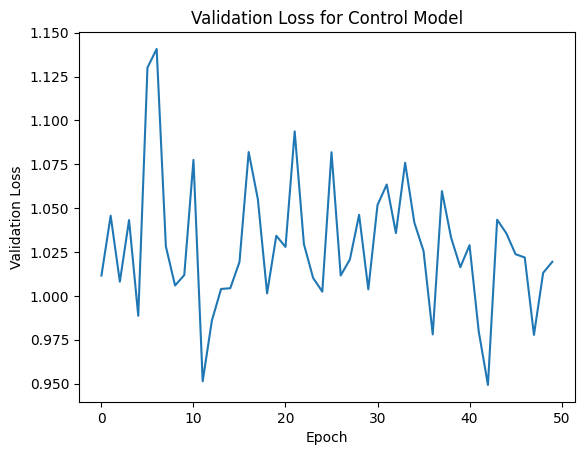

Test MAE:  52.007250854492185
Test MSE:  63.99700210571289


In [60]:
#train and test the control model
n_runs = 1
epochs = 50
training_times_control, train_losses_control, val_losses_control, test_maes_control, test_mses_control = train_and_test_control(model_control, optimizer_control, dataloader, loss_function, epochs, n_runs)

#train and test the COSGD model
#training_times_cosgd, val_losses_cosgd, test_maes_cosgd, test_mses_cosgd = train_and_test_cosgd(model_cosgd, optimizer_cosgd, dataloaders_features, loss_function, epochs, n_runs)

#plot the validation loss for the control model
plt.plot(val_losses_control[0])
plt.title('Validation Loss for Control Model')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

#plot the test MAE for the control model and mse
print('Test MAE: ', test_maes_control[0])
print('Test MSE: ', test_mses_control[0])


#plot the validation loss for the COSGD model
#plt.plot(val_losses_cosgd[0])
#plt.title('Validation Loss for COSGD Model')